In [158]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate, train_test_split, KFold
import pandas as pd
from collections import defaultdict
import math
import requests
import matplotlib.pyplot as plt

# Initial Setup


# Loading in the training data, and setting up the algorithm

In [162]:
df = pd.read_csv('leaderboard_masteries.csv', header=None, names=['summonerID', 'championID', 'rating'])

dfreader = Reader(rating_scale=(1, 100))
data = Dataset.load_from_df(df[['summonerID', 'championID', 'rating']], dfreader)
trainset = data.build_full_trainset()

algo = SVD()
algo.random_state = 1
algo.fit(trainset)

## Calculating Root Mean Squared Error and Mean Absolute Error

In [24]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    19.0115 18.9991 19.2945 19.1756 19.2771 19.1516 0.1262  
MAE (testset)     12.0961 12.0743 12.1612 12.0621 12.2624 12.1312 0.0740  
Fit time          2.50    2.48    2.49    2.48    2.53    2.50    0.02    
Test time         0.08    0.08    0.14    0.08    0.09    0.09    0.02    


{'test_rmse': array([19.01149184, 18.99912366, 19.29452695, 19.17563395, 19.27713484]),
 'test_mae': array([12.096078  , 12.07430628, 12.16115465, 12.06208638, 12.26237914]),
 'fit_time': (2.4991445541381836,
  2.484445095062256,
  2.4903063774108887,
  2.476203680038452,
  2.526463270187378),
 'test_time': (0.08105683326721191,
  0.08105683326721191,
  0.13672256469726562,
  0.07960915565490723,
  0.08789372444152832)}

## Created Dictionary of All Avaliable Champions 

In [19]:
champ_map = {266: 'Aatrox', 103: 'Ahri', 84: 'Akali',12: 'Alistar',32: 'Amumu',34: 'Anivia',1: 'Annie',523: 'Aphelios',
            22: 'Ashe', 136: 'AurelionSol', 268: 'Azir',432: 'Bard',53: 'Blitzcrank',63: 'Brand',201: 'Braum',
            51: 'Caitlyn',164: 'Camille', 69: 'Cassiopeia',31: 'Chogath',42: 'Corki',122: 'Darius',131: 'Diana',
            119: 'Draven',36: 'DrMundo',245: 'Ekko', 60: 'Elise',28: 'Evelynn',81: 'Ezreal',9: 'Fiddlesticks',
            114: 'Fiora',105: 'Fizz',3: 'Galio',41: 'Gangplank', 86: 'Garen',150: 'Gnar',79: 'Gragas',104: 'Graves',
            120: 'Hecarim',74: 'Heimerdinger',420: 'Illaoi',39: 'Irelia', 427: 'Ivern',40: 'Janna',59: 'JarvanIV',
            24: 'Jax',126: 'Jayce',202: 'Jhin',222: 'Jinx',145: 'Kaisa',429: 'Kalista', 43: 'Karma',30: 'Karthus',
            38: 'Kassadin',55: 'Katarina',10: 'Kayle', 141: 'Kayn',85: 'Kennen',121: 'Khazix', 203: 'Kindred', 240: 'Kled',
            96: 'KogMaw',7: 'Leblanc',64: 'LeeSin',89: 'Leona',876: 'Lillia',127: 'Lissandra', 236: 'Lucian',117: 'Lulu',
            99: 'Lux',54: 'Malphite',90: 'Malzahar',57: 'Maokai',11: 'MasterYi',21: 'MissFortune', 62: 'MonkeyKing',
            82: 'Mordekaiser',25: 'Morgana',267: 'Nami',75: 'Nasus',111: 'Nautilus',518: 'Neeko',76: 'Nidalee',
            56: 'Nocturne',20: 'Nunu',2: 'Olaf',61: 'Orianna',516: 'Ornn',80: 'Pantheon',78: 'Poppy',555: 'Pyke',
            246: 'Qiyana', 133: 'Quinn',497: 'Rakan',33: 'Rammus',421: 'RekSai',526: 'Rell',58: 'Renekton',107: 'Rengar',
            92: 'Riven', 68: 'Rumble',13: 'Ryze',360: 'Samira',113: 'Sejuani',235: 'Senna',147: 'Seraphine',875: 'Sett',
            35: 'Shaco', 98: 'Shen',102: 'Shyvana',27: 'Singed',14: 'Sion',15: 'Sivir',72: 'Skarner',37: 'Sona',
            16: 'Soraka',50: 'Swain', 517: 'Sylas',134: 'Syndra',223: 'TahmKench',163: 'Taliyah',91: 'Talon',44: 'Taric', 
            17: 'Teemo',412: 'Thresh', 18: 'Tristana',48: 'Trundle',23: 'Tryndamere',4: 'TwistedFate',29: 'Twitch',
            77: 'Udyr',6: 'Urgot',110: 'Varus', 67: 'Vayne',45: 'Veigar',161: 'Velkoz',254: 'Vi',112: 'Viktor',
            8: 'Vladimir',106: 'Volibear',19: 'Warwick', 498: 'Xayah',101: 'Xerath',5: 'XinZhao',157: 'Yasuo',
            777: 'Yone',83: 'Yorick',350: 'Yuumi',154: 'Zac',238: 'Zed', 115: 'Ziggs',26: 'Zilean',142: 'Zoe',143: 'Zyra',}

Checking how biased the training data set is

In [36]:
i = 0
for championID in champ_map:
    count = 0
    for row in df['championID']: 
        if row == championID:
            count += 1
    print(champ_map[championID], count)

Aatrox 497
Ahri 593
Akali 570
Alistar 544
Amumu 604
Anivia 487
Annie 655
Aphelios 288
Ashe 688
AurelionSol 449
Azir 492
Bard 505
Blitzcrank 635
Brand 599
Braum 524
Caitlyn 650
Camille 419
Cassiopeia 492
Chogath 599
Corki 525
Darius 605
Diana 501
Draven 524
DrMundo 575
Ekko 584
Elise 479
Evelynn 524
Ezreal 655
Fiddlesticks 572
Fiora 518
Fizz 587
Galio 517
Gangplank 549
Garen 634
Gnar 509
Gragas 514
Graves 593
Hecarim 540
Heimerdinger 494
Illaoi 466
Irelia 539
Ivern 357
Janna 558
JarvanIV 549
Jax 606
Jayce 493
Jhin 592
Jinx 590
Kaisa 463
Kalista 491
Karma 528
Karthus 569
Kassadin 528
Katarina 549
Kayle 623
Kayn 465
Kennen 500
Khazix 531
Kindred 495
Kled 391
KogMaw 521
Leblanc 525
LeeSin 575
Leona 599
Lillia 238
Lissandra 489
Lucian 598
Lulu 537
Lux 649
Malphite 622
Malzahar 502
Maokai 559
MasterYi 649
MissFortune 626
MonkeyKing 537
Mordekaiser 550
Morgana 656
Nami 464
Nasus 600
Nautilus 551
Neeko 350
Nidalee 540
Nocturne 499
Nunu 572
Olaf 520
Orianna 527
Ornn 406
Pantheon 556
Poppy 552
P

Getting a test data set

In [163]:
# Change this username to get results for other people
username = "jiwoo"

region = "na1"

# Replace this with a non-expired API key from Riot Games
apiKey = "REPLACE ME"

Get_SummonerInfo_URL = "https://" + region + ".api.riotgames.com/lol/summoner/v4/summoners/by-name/" + username + "?api_key=" + apiKey
response = requests.get(Get_SummonerInfo_URL)
summonerInfo = response.json()
summonerID = summonerInfo['id']
Get_ChampionMastery_URL = "https://" + region + ".api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + summonerID + "?api_key=" + apiKey
response = requests.get(Get_ChampionMastery_URL)
mastery_json = response.json()

highestChampionPoints = 0

for champion in mastery_json:
    if(champion['championPoints'] > highestChampionPoints):
        highestChampionPoints = champion['championPoints']

myDict = {'summonerID': [], 'championID': [], 'rating': []}

#change this for more data points
max_champs = 5

for x in range(0, min(len(mastery_json), max_champs)):
    normalized_points = round(mastery_json[x]["championPoints"] / highestChampionPoints * 100)
    myDict['summonerID'].append(summonerID)
    myDict['championID'].append(mastery_json[x]["championId"])
    myDict['rating'].append(normalized_points)

print(myDict)

{'summonerID': ['dnSLtyOBJCQHDgOoe09CEP3LHs_HCdUbdOgKYFUVCbezLyw', 'dnSLtyOBJCQHDgOoe09CEP3LHs_HCdUbdOgKYFUVCbezLyw', 'dnSLtyOBJCQHDgOoe09CEP3LHs_HCdUbdOgKYFUVCbezLyw', 'dnSLtyOBJCQHDgOoe09CEP3LHs_HCdUbdOgKYFUVCbezLyw', 'dnSLtyOBJCQHDgOoe09CEP3LHs_HCdUbdOgKYFUVCbezLyw'], 'championID': [64, 412, 98, 53, 79], 'rating': [100, 55, 19, 18, 16]}


Zero filling the remainder of the of the test data 

In [164]:
length = 0
for champ in champ_map:
    if int(champ) not in myDict['championID']:
        length += 1
        myDict['summonerID'].append(summonerID)
        myDict['championID'].append(int(champ))
        myDict['rating'].append(0)

Appending the test data, seperating and fitting the algorithm again

In [165]:
dataframe = df.append(pd.DataFrame(myDict))
data = Dataset.load_from_df(dataframe[['summonerID', 'championID', 'rating']], dfreader)
trainset, testset = train_test_split(data, shuffle=False, test_size=length)
algo.fit(trainset)
predictions = algo.test(testset, verbose=False)

Get the top n number of predictions

In [166]:
n = 5
top_n = defaultdict(list)
for summonerID, championID, true_r, est, _ in predictions:
    top_n[summonerID].append((championID, est))

for summonerID, user_ratings in top_n.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    if n == "max":
        top_n[summonerID] = user_ratings
    else:
        top_n[summonerID] = user_ratings[:n]

Output into readable language

In [167]:
output = ""
for x in range(0, len(champ_map) - length):
    output = champ_map[myDict['championID'][-(x + length + 1)]] + ", " + output
output = output[:-2] + "\n"
output = "Your top champions are: " + output

# Print the recommended items for each user
for summonerID, user_ratings in top_n.items():
    output += "So I recommend: "
    for (championID, _) in user_ratings:
            output += champ_map[championID] + ", "
    output = output[:-2]

print(output)

Your top champions are: LeeSin, Thresh, Shen, Blitzcrank, Gragas
So I recommend: Riven, Elise, Caitlyn, Bard, Rengar


# Checking Results

Creating helper function to get the input data into the necessary format for the algorithm

In [146]:
def getMasteries(username):    
    # Replace this with a up to date API Key from Riot Games
    apiKey = "REPLACE ME"
    
    region = "na1"
    Get_SummonerInfo_URL = "https://" + region + ".api.riotgames.com/lol/summoner/v4/summoners/by-name/" + username + "?api_key=" + apiKey
    response = requests.get(Get_SummonerInfo_URL)
    summonerInfo = response.json()
    summonerID = summonerInfo['id']
    Get_ChampionMastery_URL = "https://" + region + ".api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + summonerID + "?api_key=" + apiKey
    response = requests.get(Get_ChampionMastery_URL)
    mastery_json = response.json()

    highestChampionPoints = 0

    for champion in mastery_json:
        if(champion['championPoints'] > highestChampionPoints):
            highestChampionPoints = champion['championPoints']

    myDict = {'summonerID': [], 'championID': [], 'rating': []}
    max_champs = 5

    for x in range(0, min(len(mastery_json), max_champs)):
        normalized_points = round(mastery_json[x]["championPoints"] / highestChampionPoints * 100)
        myDict['summonerID'].append(summonerID)
        myDict['championID'].append(mastery_json[x]["championId"])
        myDict['rating'].append(normalized_points)

    return summonerID, myDict

Function to output the results

In [129]:
def recommendfor(username):
    champ_map = {266: 'Aatrox', 103: 'Ahri', 84: 'Akali',12: 'Alistar',32: 'Amumu',34: 'Anivia',1: 'Annie',523: 'Aphelios',
    22: 'Ashe', 136: 'AurelionSol', 268: 'Azir',432: 'Bard',53: 'Blitzcrank',63: 'Brand',201: 'Braum',
    51: 'Caitlyn',164: 'Camille', 69: 'Cassiopeia',31: 'Chogath',42: 'Corki',122: 'Darius',131: 'Diana',
    119: 'Draven',36: 'DrMundo',245: 'Ekko', 60: 'Elise',28: 'Evelynn',81: 'Ezreal',9: 'Fiddlesticks',
    114: 'Fiora',105: 'Fizz',3: 'Galio',41: 'Gangplank', 86: 'Garen',150: 'Gnar',79: 'Gragas',104: 'Graves',
    120: 'Hecarim',74: 'Heimerdinger',420: 'Illaoi',39: 'Irelia', 427: 'Ivern',40: 'Janna',59: 'JarvanIV',
    24: 'Jax',126: 'Jayce',202: 'Jhin',222: 'Jinx',145: 'Kaisa',429: 'Kalista', 43: 'Karma',30: 'Karthus',
    38: 'Kassadin',55: 'Katarina',10: 'Kayle', 141: 'Kayn',85: 'Kennen',121: 'Khazix', 203: 'Kindred', 240: 'Kled',
    96: 'KogMaw',7: 'Leblanc',64: 'LeeSin',89: 'Leona',876: 'Lillia',127: 'Lissandra', 236: 'Lucian',117: 'Lulu',
    99: 'Lux',54: 'Malphite',90: 'Malzahar',57: 'Maokai',11: 'MasterYi',21: 'MissFortune', 62: 'MonkeyKing',
    82: 'Mordekaiser',25: 'Morgana',267: 'Nami',75: 'Nasus',111: 'Nautilus',518: 'Neeko',76: 'Nidalee',
    56: 'Nocturne',20: 'Nunu',2: 'Olaf',61: 'Orianna',516: 'Ornn',80: 'Pantheon',78: 'Poppy',555: 'Pyke',
    246: 'Qiyana', 133: 'Quinn',497: 'Rakan',33: 'Rammus',421: 'RekSai',526: 'Rell',58: 'Renekton',107: 'Rengar',
    92: 'Riven', 68: 'Rumble',13: 'Ryze',360: 'Samira',113: 'Sejuani',235: 'Senna',147: 'Seraphine',875: 'Sett',
    35: 'Shaco', 98: 'Shen',102: 'Shyvana',27: 'Singed',14: 'Sion',15: 'Sivir',72: 'Skarner',37: 'Sona',
    16: 'Soraka',50: 'Swain', 517: 'Sylas',134: 'Syndra',223: 'TahmKench',163: 'Taliyah',91: 'Talon',44: 'Taric', 
    17: 'Teemo',412: 'Thresh', 18: 'Tristana',48: 'Trundle',23: 'Tryndamere',4: 'TwistedFate',29: 'Twitch',
    77: 'Udyr',6: 'Urgot',110: 'Varus', 67: 'Vayne',45: 'Veigar',161: 'Velkoz',254: 'Vi',112: 'Viktor',
    8: 'Vladimir',106: 'Volibear',19: 'Warwick', 498: 'Xayah',101: 'Xerath',5: 'XinZhao',157: 'Yasuo',
    777: 'Yone',83: 'Yorick',350: 'Yuumi',154: 'Zac',238: 'Zed', 115: 'Ziggs',26: 'Zilean',142: 'Zoe',143: 'Zyra',}


    df = pd.read_csv('leaderboard_masteries.csv', header=None, names=['summonerID', 'championID', 'rating'])

    dfreader = Reader(rating_scale=(1, 100))
    data = Dataset.load_from_df(df[['summonerID', 'championID', 'rating']], dfreader)
    trainset = data.build_full_trainset()

    algo = SVD()
    algo.random_state = 1
    algo.fit(trainset)

    summ_id, ratings_dict = getMasteries(username)

    length = 0
    for champ in champ_map:
        if int(champ) not in ratings_dict['championID']:
            length += 1
            ratings_dict['summonerID'].append(summ_id)
            ratings_dict['championID'].append(int(champ))
            ratings_dict['rating'].append(0)
    dataframe = df.append(pd.DataFrame(ratings_dict))
    data = Dataset.load_from_df(dataframe[['summonerID', 'championID', 'rating']], dfreader)
    trainset, testset = train_test_split(data, shuffle=False, test_size=length)

    algo.fit(trainset)
    predictions = algo.test(testset, verbose=False)
    
    n = 5
    top_n = defaultdict(list)
    for summonerID, championID, true_r, est, _ in predictions:
        top_n[summonerID].append((championID, est))

    for summonerID, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        if n == "max":
            top_n[summonerID] = user_ratings
        else:
            top_n[summonerID] = user_ratings[:n]

    return top_n[summonerID]

In [138]:
champDict = {266: ['Aatrox',0], 103: ['Ahri',0], 84: ['Akali',0],12: ['Alistar',0],32: ['Amumu',0],34: ['Anivia',0],
            1: ['Annie',0],523: ['Aphelios',0], 22: ['Ashe',0], 136: ['AurelionSol',0], 268: ['Azir',0],432: ['Bard',0],
            53: ['Blitzcrank',0],63: ['Brand',0],201: ['Braum',0], 51: ['Caitlyn',0],164: ['Camille',0], 
            69: ['Cassiopeia',0], 31: ['Chogath',0],42: ['Corki',0],122: ['Darius',0],131: ['Diana',0],
            119: ['Draven',0],36: ['DrMundo',0],245: ['Ekko',0], 60: ['Elise',0],28: ['Evelynn',0],81: ['Ezreal',0],
            9: ['Fiddlesticks',0], 114: ['Fiora',0],105: ['Fizz',0],3: ['Galio',0],41: ['Gangplank',0], 86: ['Garen',0],
            150: ['Gnar',0],79: ['Gragas',0],104: ['Graves',0], 120: ['Hecarim',0],74: ['Heimerdinger',0],420: ['Illaoi',0],
            39: ['Irelia',0], 427: ['Ivern',0],40:['Janna',0],59: ['JarvanIV',0], 24: ['Jax',0],126: ['Jayce',0],
            202: ['Jhin',0],222: ['Jinx',0],145: ['Kaisa',0],429: ['Kalista',0], 43: ['Karma',0],30: ['Karthus',0],
            38: ['Kassadin',0],55: ['Katarina',0],10: ['Kayle',0], 141: ['Kayn',0],85: ['Kennen',0],121: ['Khazix',0], 
            203: ['Kindred',0], 240: ['Kled',0], 96: ['KogMaw',0],7: ['Leblanc',0],64: ['LeeSin',0],89: ['Leona',0],
            876: ['Lillia',0],127: ['Lissandra',0], 236: ['Lucian',0],117: ['Lulu',0], 99: ['Lux',0],54: ['Malphite',0],
            90: ['Malzahar',0],57: ['Maokai',0],11: ['MasterYi',0],21: ['MissFortune',0], 62: ['MonkeyKing',0],
            82: ['Mordekaiser',0],25: ['Morgana',0],267: ['Nami',0],75: ['Nasus',0],111: ['Nautilus',0],518: ['Neeko',0],
            76: ['Nidalee',0], 56: ['Nocturne',0],20: ['Nunu',0],2: ['Olaf',0],61: ['Orianna',0],516: ['Ornn',0],
            80: ['Pantheon',0],78: ['Poppy',0],555: ['Pyke',0], 246: ['Qiyana',0], 133: ['Quinn',0],497: ['Rakan',0],
            33: ['Rammus',0],421: ['RekSai',0],526: ['Rell',0],58: ['Renekton',0],107: ['Rengar',0], 92: ['Riven',0], 
            68: ['Rumble',0],13: ['Ryze',0],360: ['Samira',0],113: ['Sejuani',0],235: ['Senna',0],147: ['Seraphine',0],
            875: ['Sett',0], 35: ['Shaco',0], 98: ['Shen',0],102: ['Shyvana',0],27: ['Singed',0],14: ['Sion',0],
            15: ['Sivir',0],72: ['Skarner',0],37: ['Sona',0], 16: ['Soraka',0],50: ['Swain',0], 517: ['Sylas',0],
            134: ['Syndra',0],223: ['TahmKench',0],163: ['Taliyah',0],91: ['Talon',0],44: ['Taric',0], 17: ['Teemo',0],
            412: ['Thresh',0], 18: ['Tristana',0],48: ['Trundle',0],23: ['Tryndamere',0],4: ['TwistedFate',0],
            29: ['Twitch',0], 77: ['Udyr',0],6: ['Urgot',0],110: ['Varus',0], 67: ['Vayne',0],45: ['Veigar',0],
            161: ['Velkoz',0],254: ['Vi',0],112: ['Viktor',0], 8: ['Vladimir',0],106: ['Volibear',0],19: ['Warwick',0], 
            498: ['Xayah',0],101: ['Xerath',0],5: ['XinZhao',0],157: ['Yasuo',0], 777: ['Yone',0],83: ['Yorick',0],
            350: ['Yuumi',0],154: ['Zac',0],238: ['Zed',0], 115: ['Ziggs',0],26: ['Zilean',0],142: ['Zoe',0],
            143: ['Zyra',0]}

## Loading List of Players to Recommend Champions for

In [141]:
checked_df = pd.read_csv('checkedUsernames.csv', header=None, names=['summonerName'])
checked_df.head()

,summonerName
0,christian480
1,mochitan
2,chrisosaur214
3,crackerjax
4,skullkidteffsly


## Recommending Champions to Them

In [156]:
for index,row in checked_df.iterrows():
    topRecommendations = recommendfor(row[0])
    for champion in topRecommendations:
        champDict[champion[0]][1] += 1  

## Exporting Results to a Bar Graph

In [214]:
xValues = []
for key in champDict:
    xValues.append(champDict[key][0])

In [216]:
yValues = []
for key in champDict:
    yValues.append(champDict[key][1])

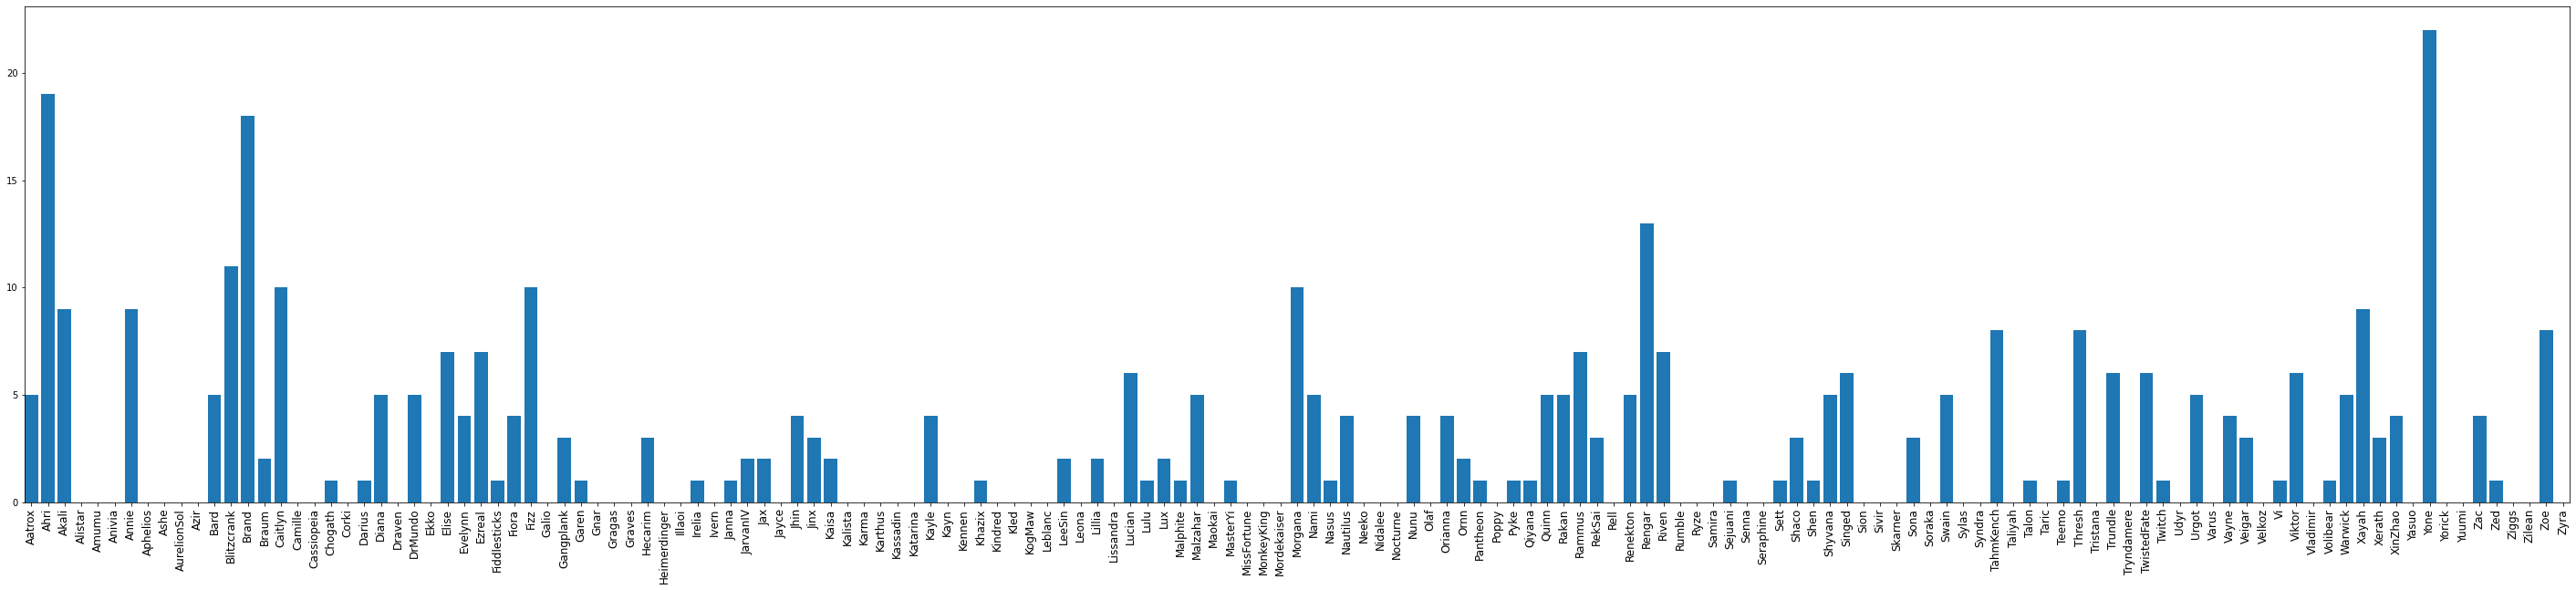

In [249]:
plt.figure(figsize=(50,10))
plt.xticks(rotation='vertical', fontsize = 12)
plt.gca().margins(x=0)
plt.bar(xValues,yValues)
plt.savefig("test.jpg")

### Counting zero recommendations

In [250]:
zero_count = 0
for value in yValues:
    if value == 0:
        zero_count += 1
print(zero_count)

68
